In [2]:
import chess
import chess.pgn
import io

In [3]:
pgn_data = """
[Event "Rated Blitz game"]
[Site "https://lichess.org/pgnm3ztm"]
[White "ASTROSCEPTRE"]
[Black "danilober"]
[Result "0-1"]
[UTCDate "2013.11.30"]
[UTCTime "23:00:16"]
[WhiteElo "1253"]
[BlackElo "1586"]
[WhiteRatingDiff "-6"]
[BlackRatingDiff "+3"]
[ECO "C42"]
[Opening "Russian Game: Urusov Gambit"]
[TimeControl "300+2"]
[Termination "Normal"]

1. e4 e5 2. Bc4 Nf6 3. Nf3 Nxe4 4. Bxf7+ Kxf7 5. Nxe5+ Kg8 6. O-O d6 7. Nc4 b5 8. Ne3 Bb7 9. d3 Nf6 10. c3 g6 11. f4 Bg7 12. f5 Nc6 13. Qb3+ Kf8 14. fxg6 hxg6 15. Ng4 Ne5 16. Nxf6 Bxf6 17. d4 Ng4 18. Bg5 Kg7 19. Bxf6+ Nxf6 20. Qe6 Rhe8 21. Qh3 Re2 22. Na3 Rxg2+ 0-1
"""

# Load the PGN data
pgn = chess.pgn.read_game(io.StringIO(pgn_data))

# Display game headers
print(f"Event: {pgn.headers['Event']}")
print(f"Site: {pgn.headers['Site']}")
print(f"White: {pgn.headers['White']} (Elo: {pgn.headers['WhiteElo']})")
print(f"Black: {pgn.headers['Black']} (Elo: {pgn.headers['BlackElo']})")
print(f"Result: {pgn.headers['Result']}")
print(f"Opening: {pgn.headers['Opening']}")

# Explore the moves
board = pgn.board()
for move in pgn.mainline_moves():
    board.push(move)
print(board)
    

Event: Rated Blitz game
Site: https://lichess.org/pgnm3ztm
White: ASTROSCEPTRE (Elo: 1253)
Black: danilober (Elo: 1586)
Result: 0-1
Opening: Russian Game: Urusov Gambit
r . . q . . . .
p b p . . . k .
. . . p . n p .
. p . . . . . .
. . . P . . . .
N . P . . . . Q
P P . . . . r P
R . . . . R K .


In [4]:
def parse_pgn_file(file_path):
    games = []
    with open(file_path , 'r') as file:
        pgn = chess.pgn.read_game(file)
        while pgn is not None:
            games.append(pgn)
            pgn = chess.pgn.read_game(file)
    return games

In [6]:
file_path = "C:/Users/Bharath/Documents/Chess-game-EDA/dataset/PGN-Single/lichess_db_standard_rated_2013-01.pgn"
games = parse_pgn_file(file_path)

In [7]:
print(f"Total games played : {len(games)} games")

Total games played : 121332 games


In [8]:
print(games[0].headers.get("White"))
print(games[0].mainline_moves())

BFG9k
1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8#


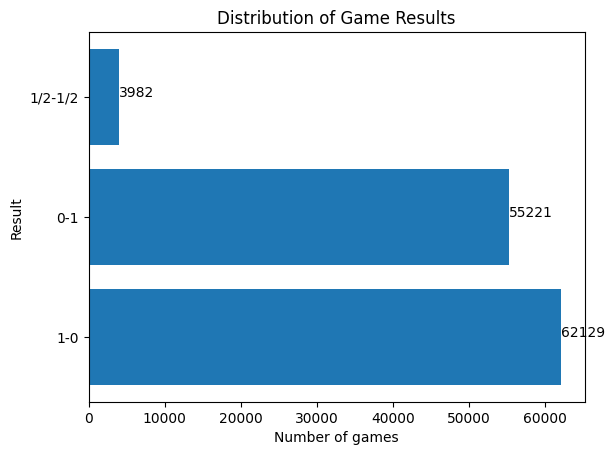

In [9]:
import matplotlib.pyplot as plt
from collections import Counter

results = [game.headers.get("Result") for game in games]
results_counter = Counter(results)

plt.barh(results_counter.keys(),results_counter.values())
for index , value in enumerate(results_counter.values()):
    # print(value)
    plt.text(value,index,str(value))
plt.ylabel("Result")
plt.xlabel("Number of games")
plt.title("Distribution of Game Results")

plt.show()

In [10]:
def count_wins(games):
    win_counter = Counter()
    for game in games:
        result = game.headers.get("Result")
        if result == "1-0":
            winner_name = game.headers.get("White")
            win_counter[winner_name] += 1
        elif result == "0-1":
            winner_name = game.headers.get("Black")
            win_counter[winner_name] += 1
    return win_counter

In [22]:
win_counter = count_wins(games)
sorted_win_counter = {k:v for k,v in sorted(win_counter.items(),key= lambda item : item[1],reverse=True)}

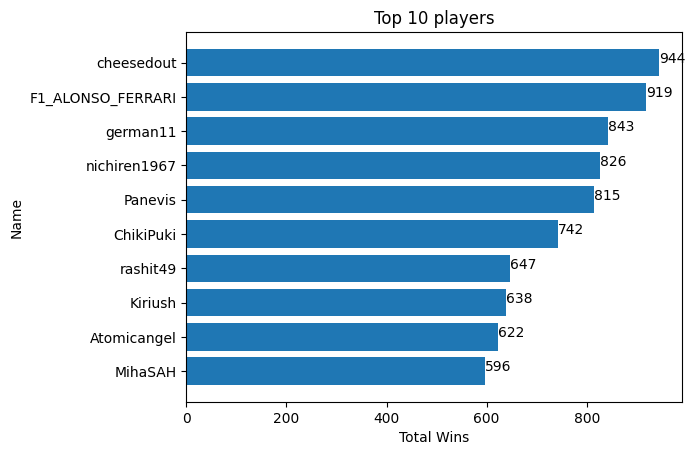

In [35]:
#Top 10 players who won more games
top_10_players = list(sorted_win_counter.items())[:10]
players = [player for player , wins in top_10_players]
wins_counts = [wins for player , wins in top_10_players]
for index,wins in enumerate(wins_counts):
    plt.text(wins,index,str(wins))
plt.barh(players,wins_counts)
plt.ylabel("Name")
plt.xlabel("Total Wins")
plt.title("Top 10 players")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#Bottom 10 players
